<h2>Twitter Sentiment Analysis - Analytics Vidhya</h2>

<h3>Problem Statement:</h3>

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import train and validation data
train_data = pd.read_csv("E:\\iNeuron\\Projects\\Twitter_Sentiment_Analysis\\Kaggle\\artifacts\\twitter_training.csv", header=None)
val_data = pd.read_csv("E:\\iNeuron\\Projects\\Twitter_Sentiment_Analysis\\Kaggle\\artifacts\\twitter_validation.csv", header=None)

In [3]:
# first five records
train_data.columns = ['id','information','type','text']
train_data.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val_data.columns = ['id','information','type','text']
val_data.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Now, we will first convert the text column into lowercase and convert any row having only numerical data into string. Then, we will use a regex expression to erase the special characters.

In [5]:
train_data['text'] = train_data['text'].str.lower()
train_data['text'] = [str(data) for data in train_data['text']]
train_data['text'] = train_data['text'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))
val_data['text'] = val_data['text'].str.lower()
val_data['text'] = [str(data) for data in val_data['text']]
val_data['text'] = val_data['text'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [6]:
train_data.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


To identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".

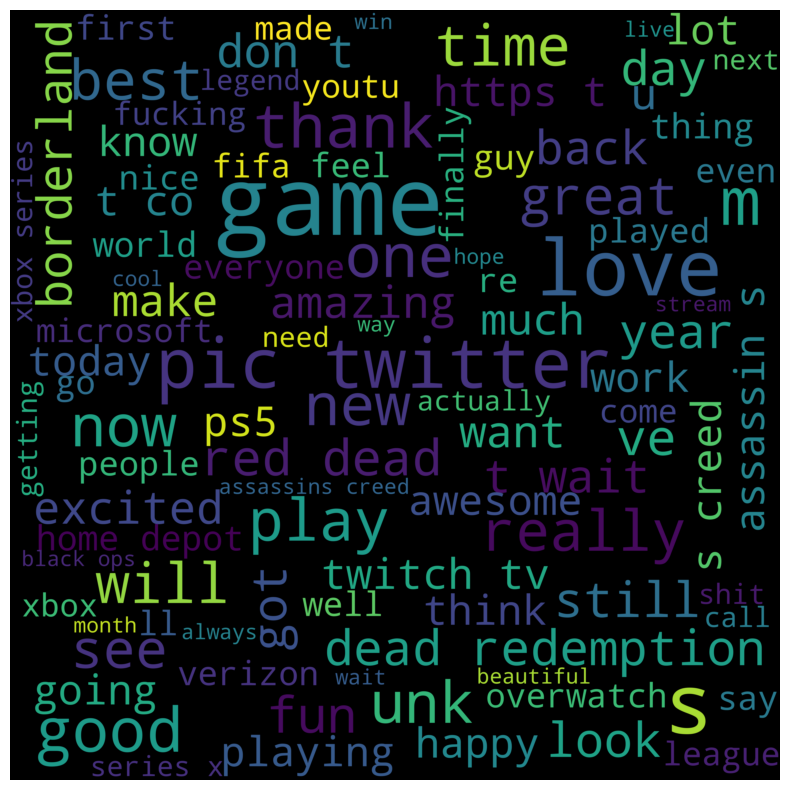

In [7]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].text)
#Creation of wordcloud
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", scale=10, width=800, height=800).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for the negative tweets, some curse words were the most important while the names of some games and industries were also very used, such as facebook and eamaddennfl.

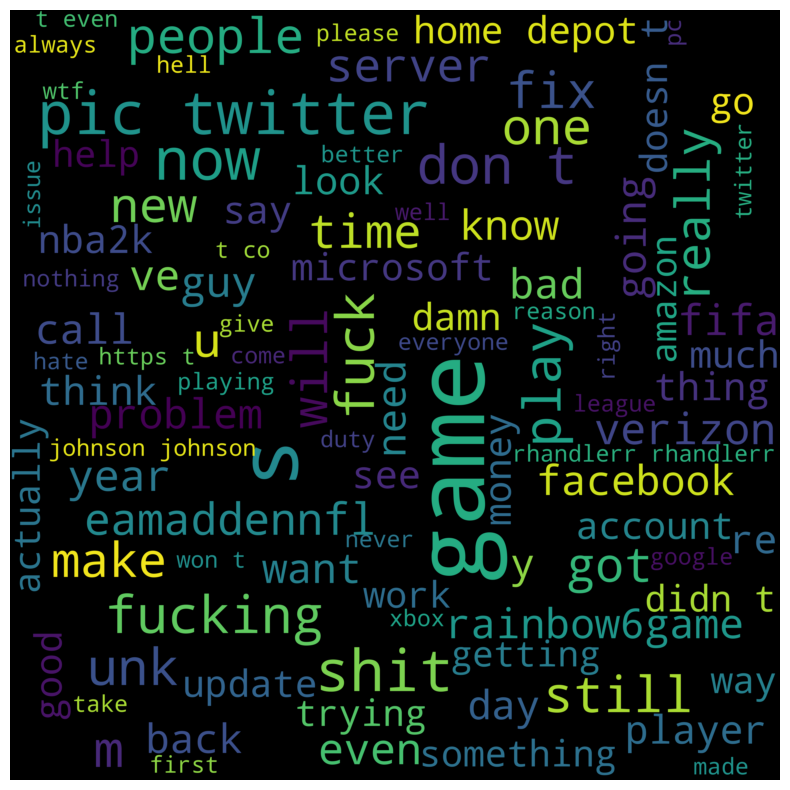

In [8]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The irrelevant tweets show a similar trend as negative ones, something that will impact the overall prediction performance.

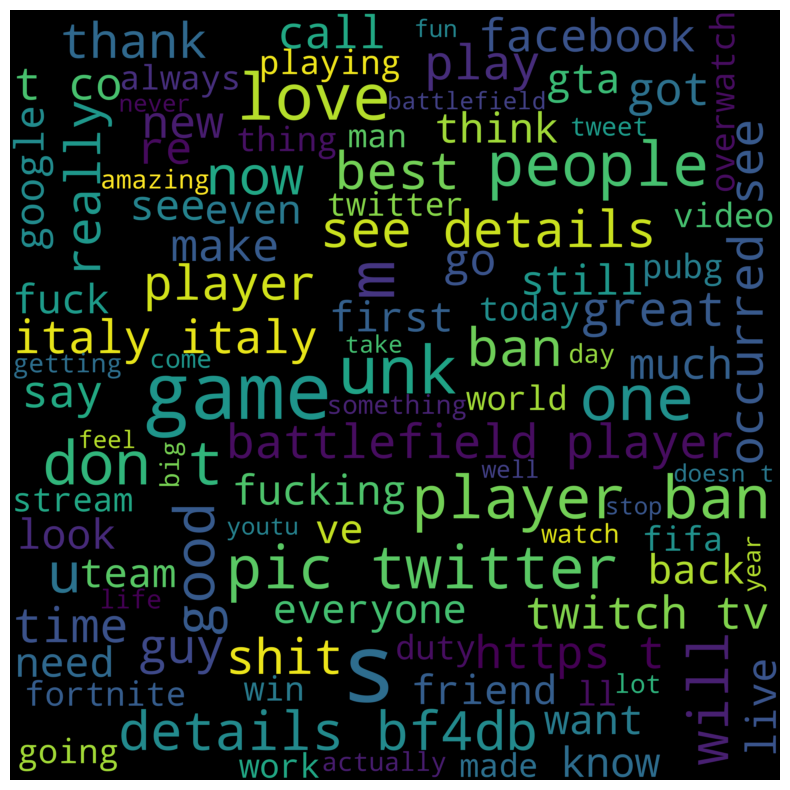

In [9]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.

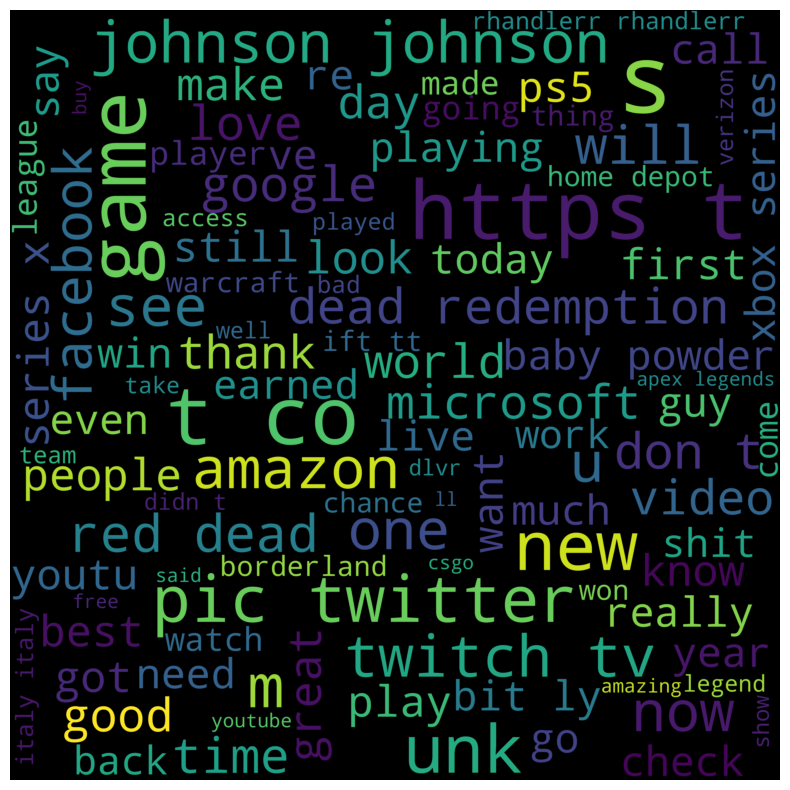

In [10]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.

In [11]:
#Count information per category
plot1=train_data.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192


As an interesting fact, the number of modified texts coincides with the id. For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

Text(0.5, 1.0, 'Distribution of tweets per Branch and Type')

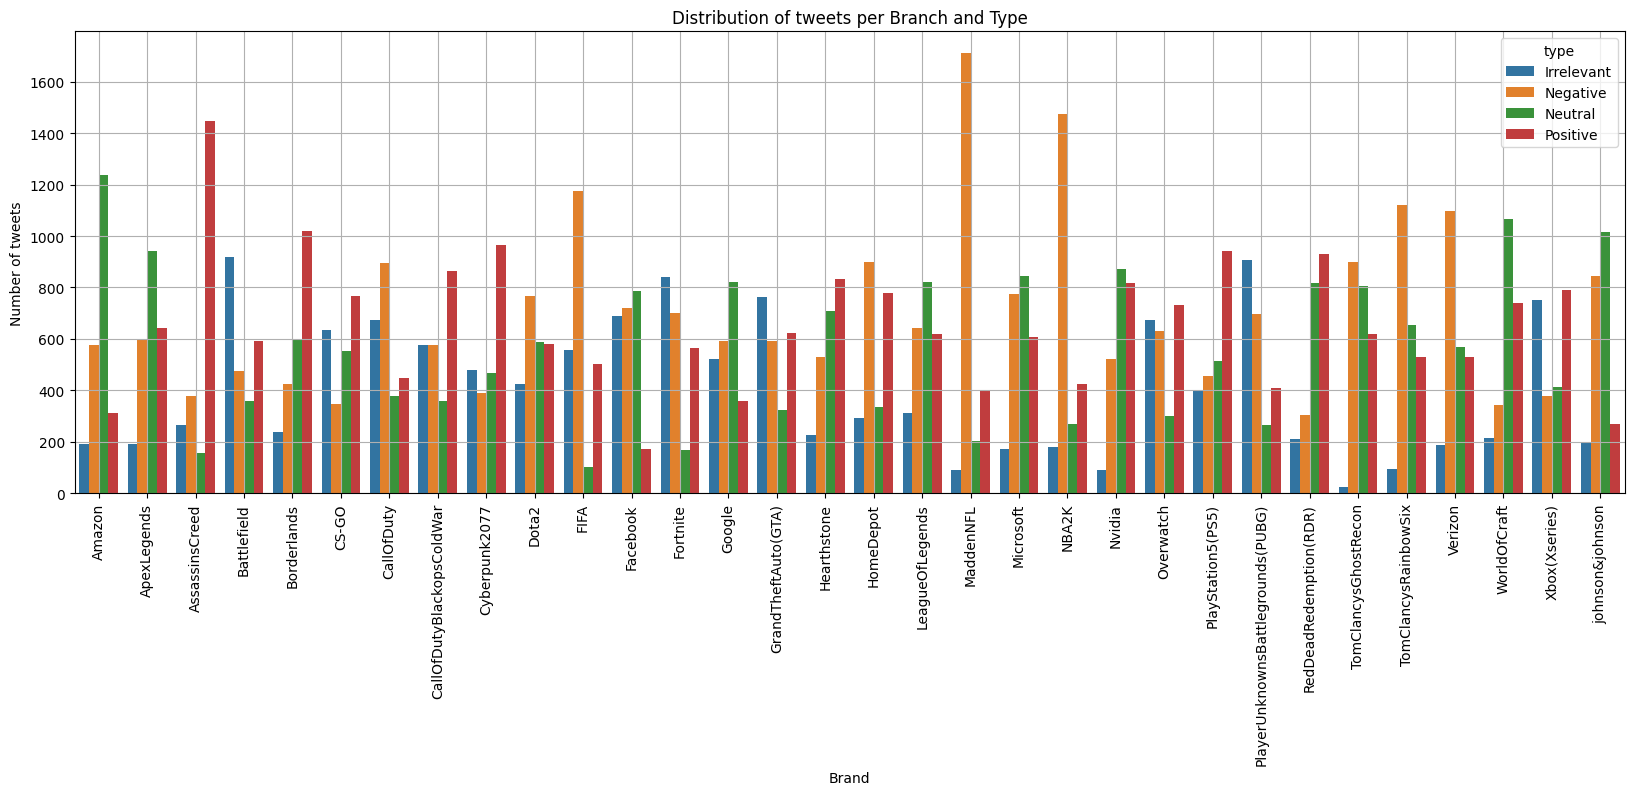

In [12]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")